In [135]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
import scipy.stats as sts
from scipy.stats import linregress
from matplotlib import pyplot as plt
import json
from pprint import pprint
pd.options.display.max_rows = 10 

In [136]:
path_stats_file = "data_resources/QB Stats and Weather Data.csv"
QB_df = pd.read_csv(path_stats_file)
QB_df.head()

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
0,0,3603,2015,1,Kaepernick,C,QB,7,Vikings,49ers,...,0,0,0,83.012821,2015,Regular,Grass,66.2,mostly cloudy,9.2
1,11,3590,2015,1,Cutler,J,QB,6,Packers,Bears,...,0,0,0,67.476852,2015,Regular,Grass,69.1,mostly cloudy,8.1
2,22,3599,2015,1,Dalton,A,QB,14,Raiders,Bengals,...,0,0,0,115.931373,2015,Regular,Grass,64.0,scattered clouds,15.0
3,32,3589,2015,1,Taylor,T,QB,2,Colts,Bills,...,0,0,0,123.793860,2015,Regular,Turf,53.1,light rain,13.8
4,42,3598,2015,1,Manning,P,QB,18,Ravens,Broncos,...,0,0,0,59.895833,2015,Regular,Grass,82.9,mostly cloudy,11.5


In [29]:
#value_counts on conditions
QB_conditions = QB_df[["QB Rating", "conditions"]]
QB_conditions
QB_conditions["conditions"].value_counts()

clear sky               786
overcast                392
mostly cloudy           227
partly cloudy           219
scattered clouds        138
overcast clouds         120
broken clouds            95
light rain               83
few clouds               61
rain                     57
moderate rain            33
cloudy                   33
haze                     22
light snow               16
snow                      8
mist                      6
heavy intensity rain      4
chance rain               4
fog                       2
thunderstorm              2
very heavy rain           2
breeze                    2
heavy rain                2
cold                      2
shower rain               2
Name: conditions, dtype: int64

In [6]:
#value_counts on windspeed
QB_windconditions = QB_df[["QB Rating", "windSpeed"]]
QB_windconditions["windSpeed"].value_counts()

0.00     165
3.36     101
4.70      88
4.60      85
6.90      82
        ... 
2.37       2
3.60       2
2.59       2
5.12       2
15.14      1
Name: windSpeed, Length: 118, dtype: int64

In [30]:
#Wind speed stats
QB_wind = QB_df[["QB Rating", "windSpeed"]]
QB_wind["windSpeed"].max()

39.15

In [31]:
QB_wind["windSpeed"].min()

0.0

In [32]:
QB_wind["windSpeed"].mean()

8.022395157803778

In [33]:
QB_wind["windSpeed"].median()

7.0

In [43]:
#high wind (>25)
QB_highwinds = game_stats_df[["QB Rating", "windSpeed"]]
QB_highwinds = QB_rating_highwindconditions.query('windSpeed > 25')
QB_highwinds["windSpeed"].count()
#How is this an odd number?

11

In [47]:
QB_highwinds["QB Rating"].max()

125.61274509803921

In [48]:
QB_highwinds["QB Rating"].min()

52.08333333333334

In [49]:
QB_highwinds["QB Rating"].mean()

85.10456884008579

In [50]:
QB_highwinds["QB Rating"].median()

79.73484848484848

In [35]:
#value_counts on heavy rain
QB_heavyrain = QB_df[["QB Rating", "conditions"]]
QB_heavyrain = QB_heavyrain.query('conditions == "heavy intensity rain" or conditions == "very heavy rain"or conditions == "heavy rain"  or  conditions == "thunderstorm" ')
QB_heavyrain.value_counts()


QB Rating   conditions          
110.218254  heavy intensity rain    1
97.537879   heavy rain              1
91.388889   thunderstorm            1
91.319444   heavy intensity rain    1
87.916667   very heavy rain         1
86.322464   heavy intensity rain    1
79.583333   thunderstorm            1
77.840909   very heavy rain         1
59.821429   heavy intensity rain    1
57.025194   heavy rain              1
dtype: int64

In [37]:
#QB Rating stats in heavy rain
#Includes "heavy rain", "very heavy rain", "heavy intensity rain" and thunderstorms
QB_heavyrain["QB Rating"].max()

110.21825396825398

In [38]:
QB_heavyrain["QB Rating"].min()

57.0251937984496

In [40]:
QB_heavyrain["QB Rating"].mean()

83.89744613183694

In [41]:
QB_heavyrain["QB Rating"].median()

87.11956521739131

In [53]:
#high temperature (>85)
QB_hightemp = QB_df[["QB Rating", "temperature"]]
QB_hightemp = QB_hightemp.query('temperature > 85')
QB_hightemp["QB Rating"].value_counts()

63.958333     1
117.408192    1
78.298611     1
83.083333     1
45.370370     1
             ..
94.886364     1
47.559524     1
93.005952     1
101.539855    1
93.750000     1
Name: QB Rating, Length: 117, dtype: int64

In [ ]:
#QB stats in high temperatures(>85)

In [54]:
QB_hightemp["QB Rating"].max()

223.75000000000003

In [55]:
QB_hightemp["QB Rating"].min()

3.869047619047628

In [56]:
QB_hightemp["QB Rating"].mean()

89.6397173215305

In [57]:
QB_hightemp["QB Rating"].median()

91.5277777777778

In [58]:
#all conditions
QB_df["QB Rating"].max()

223.75000000000003

In [59]:
QB_df["QB Rating"].min()

-91.36904761904762

In [60]:
QB_df["QB Rating"].mean()

89.65904650494794

In [61]:
QB_df["QB Rating"].median()

88.97832491582491

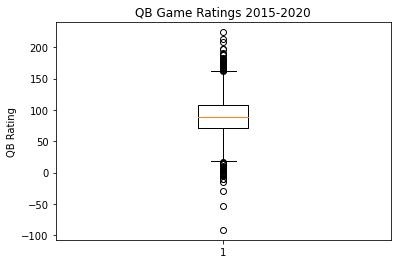

In [62]:
#look for outliers
QBRating=QB_df["QB Rating"]
fig, ax = plt.subplots()
ax.set_title('QB Game Ratings 2015-2020')
ax.set_ylabel('QB Rating')
ax.boxplot(QBRating)
plt.show()
#Is there a correlation between outliers and weather conditions?

In [63]:
quartiles = QBRating.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq  

print(f"The lower quartile of QB Rating is: {lowerq}")
print(f"The upper quartile of QB Rating is: {upperq}")
print(f"The interquartile range of QB Rating is: {iqr}")
print(f"The the median of QB Rating is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of QB Rating is: 71.6999299719888
The upper quartile of QB Rating is: 107.81926406926404
The interquartile range of QB Rating is: 36.11933409727524
The the median of QB Rating is: 88.97832491582491 
Values below 17.52092882607593 could be outliers.
Values above 161.9982652151769 could be outliers.


In [67]:
QB_wind_ranges_df = QB_wind.query('windSpeed ==0 or windSpeed <10  or windSpeed <15 or  windSpeed < 25 or windSpeed <40 ')
QB_wind_ranges_df["windSpeed"].value_counts()
#This doesn't return desired data/need to fix

0.00     165
3.36     101
4.70      88
4.60      85
6.90      82
        ... 
2.37       2
3.60       2
2.59       2
5.12       2
15.14      1
Name: windSpeed, Length: 118, dtype: int64

In [ ]:
#Do we want to look at ouliers for weather correlation?

NormaltestResult(statistic=1.501133955694346, pvalue=0.47209880727991016)


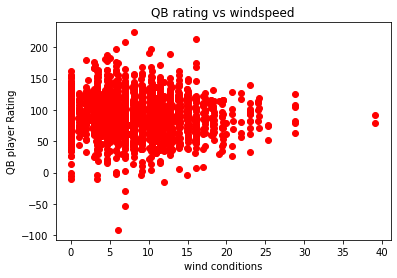

In [75]:
plt.title("QB rating vs windspeed")
plt.xlabel("wind conditions")
plt.ylabel("QB player Rating")
plt.scatter(QB_wind["windSpeed"], QB_wind["QB Rating"], color='r')
print(sts.normaltest(QB_wind["QB Rating"].sample(100)))
#Does this have value?
#p-value indicates accept null hypothesis

In [80]:
#Create bins for wind speed
bins=[-1, 5, 10, 15, 20, 25, 40]
group_labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26-40"]
pd.cut(QB_wind["windSpeed"], bins, labels=group_labels).head()

0     6-10
1     6-10
2    11-15
3    11-15
4    11-15
Name: windSpeed, dtype: category
Categories (6, object): ['0-5' < '6-10' < '11-15' < '16-20' < '21-25' < '26-40']

NormaltestResult(statistic=8.598104780673124, pvalue=0.013581422803803839)


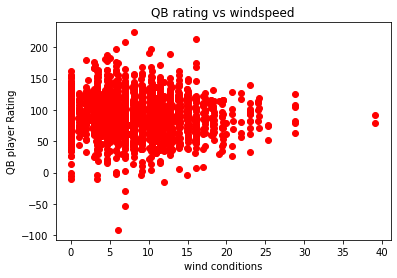

In [81]:
plt.title("QB rating vs windspeed")
plt.xlabel("wind conditions")
plt.ylabel("QB player Rating")
plt.scatter(QB_wind["windSpeed"], QB_wind["QB Rating"], color='r')
print(sts.normaltest(QB_wind["QB Rating"].sample(100)))
#p-value is inconsistent with sampling

NormaltestResult(statistic=92.73422396027158, pvalue=7.29489634436288e-21)


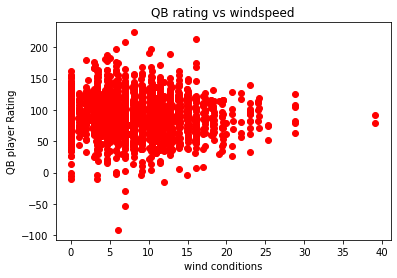

In [85]:
plt.title("QB rating vs windspeed")
plt.xlabel("wind conditions")
plt.ylabel("QB player Rating")
plt.scatter(QB_wind["windSpeed"], QB_wind["QB Rating"], color='r')
print(sts.normaltest(QB_wind["QB Rating"]))
#Indicates reject the null hypothesis

In [139]:
QB_index=QB_df.set_index("lastName").groupby(["lastName"])
Avg_QB_Rating_df=QB_index["QB Rating"].mean()
Avg_QB_Rating_df.sort_values(ascending=False)


lastName
Mahomes     111.694725
Henne       111.197917
Jackson     106.716854
Weeden      105.208333
Wilson      105.002366
               ...    
Sanchez      38.289436
Peterman     35.867977
Stidham      33.680070
Tolzien      27.083333
Walker       24.325980
Name: QB Rating, Length: 111, dtype: float64

In [90]:
tom_brady = QB_df.loc[QB_df['lastName'] == 'Brady']
QB_df['Wind Category'] = pd.cut(QB_df['windSpeed'], bins, labels=group_labels)
tom_brady

,Unnamed: 0,gameId,season_x,week,lastName,firstName,position,uniformNumber,opponent,team,...,rec,recYds,recTds,QB Rating,season_y,type,surface,temperature,conditions,windSpeed
15,213,3588,2015,1,Brady,T,QB,12,Steelers,Patriots,...,0,0,0,146.354167,2015,Regular,Turf,64.9,overcast,5.80
41,547,3609,2015,2,Brady,T,QB,12,Bills,Patriots,...,0,0,0,105.387931,2015,Regular,Turf,64.9,mostly cloudy,8.10
67,878,3626,2015,3,Brady,T,QB,12,Jaguars,Patriots,...,0,0,0,118.948413,2015,Regular,Turf,73.0,clear sky,0.00
152,2083,3684,2015,7,Brady,T,QB,12,Jets,Patriots,...,0,0,0,94.290123,2015,Regular,Turf,60.1,overcast,6.90
172,2386,3693,2015,8,Brady,T,QB,12,Dolphins,Patriots,...,0,0,0,133.223684,2015,Regular,Turf,59.0,clear sky,11.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2157,29876,5347,2020,10,Brady,T,QB,12,Panthers,Buccaneers,...,0,0,0,123.985043,2020,Regular,Grass,71.0,broken clouds,14.99
2175,30137,5372,2020,11,Brady,T,QB,12,Rams,Buccaneers,...,0,0,0,61.024306,2020,Regular,Grass,69.0,clear sky,5.00
2195,30473,5386,2020,12,Brady,T,QB,12,Chiefs,Buccaneers,...,0,0,0,96.087398,2020,Regular,Grass,81.0,clear sky,5.00
2236,31119,5412,2020,14,Brady,T,QB,12,Vikings,Buccaneers,...,0,0,0,120.923913,2020,Regular,Grass,79.0,broken clouds,8.05


In [86]:
tom_group = tom_brady.groupby('Wind Category')['QB Rating'].mean()
tom_group

Wind Category
0-5       99.396985
6-10      99.059497
11-15    102.667056
16-20     94.094788
21-25           NaN
26-40           NaN
Name: QB Rating, dtype: float64

In [87]:
pd.DataFrame(tom_group).reset_index()

,Wind Category,QB Rating
0,0-5,99.396985
1,6-10,99.059497
2,11-15,102.667056
3,16-20,94.094788
4,21-25,NaN
5,26-40,NaN


In [97]:
top_five=["Brady", "Rivers", "Rodgers", "Carr", "Wilson"]
top_QB_df= weather_QB_pd[weather_QB_pd.lastName.isin(top_five)].copy()

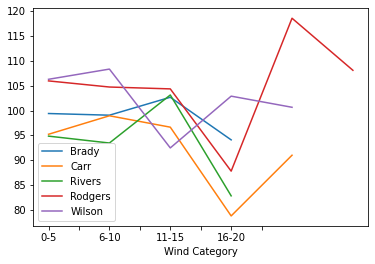

In [98]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating', label=qb_name)

#x_axis = np.arange(len("Wind Category"))    
#tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, group_labels)
plt.legend()
plt.show()

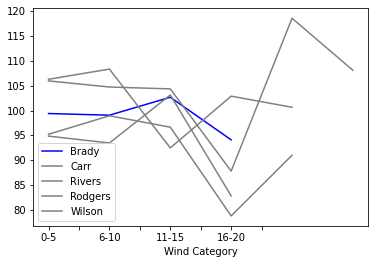

In [92]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    if qb_name=="Brady":
        color="b"
    else:
        color="gray"
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating',c=color, label=qb_name)

#x_axis = np.arange(len("Wind Category"))    
#tick_locations = [value for value in x_axis]

#plt.xticks(tick_locations, group_labels)
plt.legend()
plt.show()

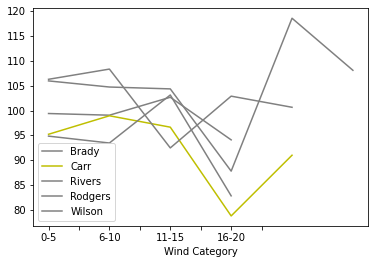

In [93]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    if qb_name=="Carr":
        color="y"
    else:
        color="gray"
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating',c=color, label=qb_name)
#xticks=
plt.legend()
plt.show()

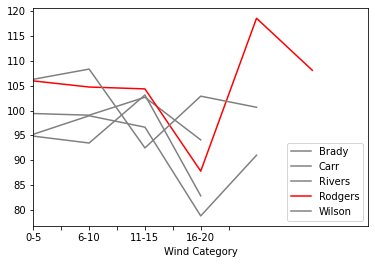

In [94]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    if qb_name=="Rodgers":
        color="r"
    else:
        color="gray"
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating',c=color, label=qb_name)
#xticks=
ax.set_xlim(left=0, right=6)

plt.legend()
plt.show()

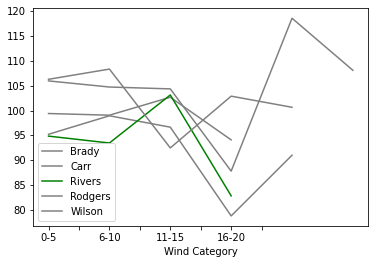

In [95]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    if qb_name=="Rivers":
        color="g"
    else:
        color="gray"
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating',c=color, label=qb_name)
#xticks=
plt.legend()
plt.show()

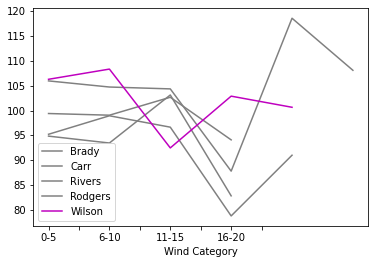

In [96]:
fig, ax = plt.subplots()
for qb_name,df_temp in top_QB_df.groupby(['lastName']):
    if qb_name=="Wilson":
        color="m"
    else:
        color="gray"
    
    temp_group = df_temp.groupby(['Wind Category'])['QB Rating'].mean()
    ax = pd.DataFrame(temp_group).reset_index().plot(ax=ax, kind='line', x='Wind Category',y='QB Rating',c=color, label=qb_name)
#xticks=
plt.legend()
plt.show()

In [ ]:
QB_rating_condition_wind.loc["Wind Category"]=pd.cut(QB_rating_condition_wind["windSpeed"], bins, labels=group_labels)
QB_rating_condition_wind.head()

In [ ]:
windspeed_group_df= QB_rating_condition_wind.groupby("Wind Category")
print(windspeed_group_df["QB Rating"].count())

In [ ]:
windspeed_top5_df= QB_rating_condition_wind.groupby("Wind Category")
print(windspeed_top5_df["QB Rating"].count())

In [ ]:
plt.title("QB rating vs windspeed")
plt.xlabel("wind conditions")
plt.ylabel("QB player Rating")
plt.scatter(windspeed_group_df["Wind Category"], windspeed_group_df["QB Rating"], color='r')

In [ ]:
QB_rating_condition_narrow = QB_rating_condition.query('conditions == "clear sky" or conditions == "overcast clouds" or conditions == "light snow" ')
QB_rating_condition_narrow

In [ ]:
x_axis_pd = QB_rating_condition_narrow["conditions"]
x_axis_pd 

In [ ]:
plt.title("QB rating vs weather conditions")
plt.xlabel("weather conditions")
plt.ylabel("QB player Rating")
plt.bar(QB_rating_condition_narrow["conditions"], QB_rating_condition_narrow["QB Rating"], color='b', alpha=0.5, align="center")

In [ ]:
x_axis_wind_speed = weather_QB_pd["windSpeed"]
x_axis_wind_speed
y_axis_wind_speed = weather_QB_pd["QB Rating"]
plt.xlabel("wind speed")
plt.ylabel("QB player Rating")
plt.bar(x_axis_wind_speed, y_axis_wind_speed , color='b', alpha=0.5, align="center")

In [ ]:
QB_rating_temperature = weather_QB_pd[["QB Rating", "temperature"]]

#Remove Nan from dataSet
QB_rating_temperature["temperature"].value_counts()

In [ ]:
QB_rating_temperature.dropna(inplace=True)

In [ ]:
QB_rating_temperature


In [ ]:
x_values= QB_rating_temperature["temperature"]
y_values= QB_rating_temperature["QB Rating"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("QB_rating' VS  Temperature")
plt.xlabel('temperature')
plt.ylabel('QB Rating')
plt.xlim(0,100)
plt.ylim(0,200)
plt.grid(True)
plt.show()
print(f"The r-squared value is: {rvalue**2}")
print(f"The p-value is : {p})


In [ ]:
 QB_rating_temperature["QB Rating"]

In [ ]:
#Rain
QB_rating_rain_df1 = weather_QB_pd.query('(conditions == "rain rain " or conditions == "heavy intensity rain") and lastName == "Jackson" ')

QB_rating_rain_df1

In [ ]:
QB_rating_rain_df2 = weather_QB_pd.query('conditions == "heavy intensity rain"')

QB_rating_rain_df2

In [ ]:
weather_QB_pd[["QB Rating"]].describe

In [ ]:
#weather data weather_QB_pd
weather_QB_pd[["windSpeed","temperature","conditions"]]